#

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [4]:
# same link as for finches -> carnivora
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/carnivora.csv")

In [5]:
df.head()

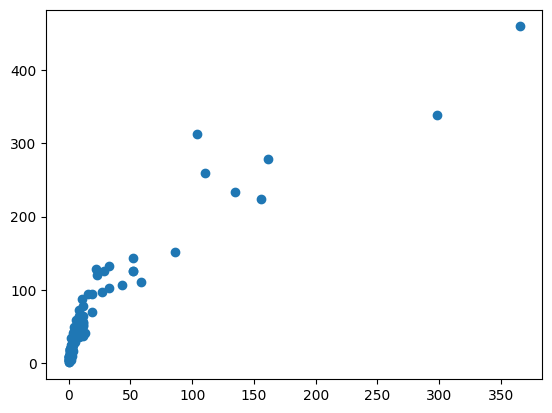

In [9]:
plt.scatter(df["SW"], df["SB"])

In [46]:
model = smf.ols("SB ~ SW + I(SW* SW)", data = df)
fit = model.fit()

In [47]:
fit.summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 1.83e+04. This might indicate that there are strong multicollinearity or other numerical problems.

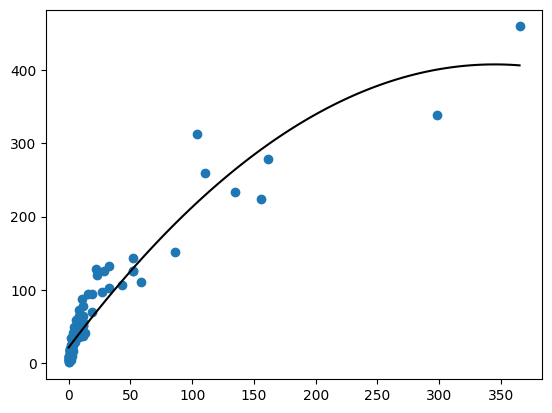

In [50]:
mn, mx = np.min(df["SW"]), np.max(df["SW"])
ndf = pd.DataFrame.from_dict({
    "SW": np.linspace(mn, mx, 101)
})
ndf["yhat"] = fit.predict(ndf)
plt.scatter(df["SW"], df["SB"])
plt.plot(ndf["SW"], ndf["yhat"], color = "black")

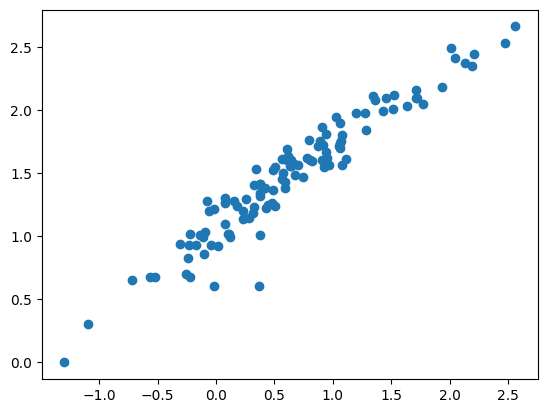

In [51]:
plt.scatter(np.log10(df["SW"]), np.log10(df["SB"]))

In [52]:
model = smf.ols("np.log10(SB) ~ np.log10(SW)", data = df)
fit = model.fit()

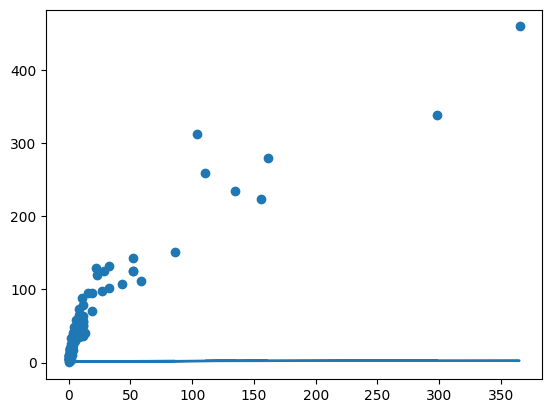

In [53]:
yhat = fit.predict(df)
plt.scatter(df["SW"], df["SB"])
plt.plot(df["SW"], yhat)

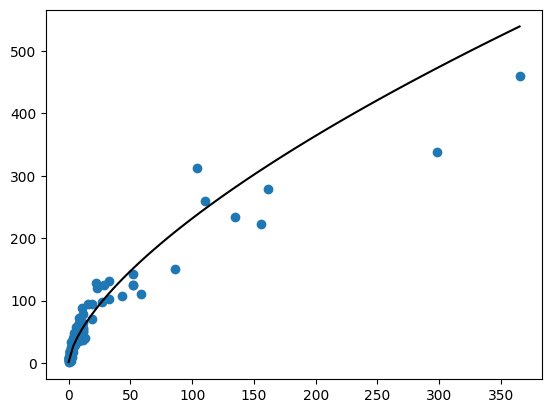

In [55]:
mn, mx = np.min(df["SW"]), np.max(df["SW"])
ndf = pd.DataFrame.from_dict({
    "SW": np.linspace(mn, mx, 101)
})
ndf["yhat"] = fit.predict(ndf)
plt.scatter(df["SW"], df["SB"])
plt.plot(ndf["SW"], 10 ** ndf["yhat"], color = "black")

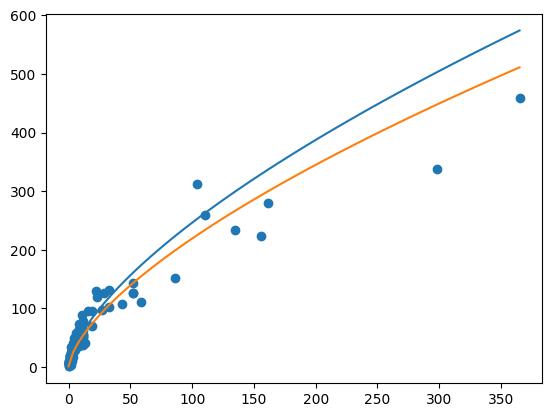

In [32]:
# instantiate and fit model here: log10 both x, y, and 
# unique "intercepts" by SuperFamily

mn, mx = np.min(df["SW"]), np.max(df["SW"])
x = np.linspace(mn, mx, 101)
ndf = pd.DataFrame.from_dict({
    "SuperFamily": np.repeat(["Caniformia", "Feliformia"], 101),
    "SW": np.tile(x, 2)
})
ndf["yhat"] = fit.predict(ndf)


# make plot here: one line for each SuperFamily